In [100]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

In [101]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
# Afficher le nombre de lignes et de colonnes du DataFrame
nombre_lignes, nombre_colonnes = train_data.shape
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")


Nombre de lignes : 891
Nombre de colonnes : 12


In [104]:
# Explorer les premières lignes des datasets
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [105]:
# Informations sur les types de données
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [106]:
#0: le passager n'a pas survécu et 1: le passager a survécu
# Vérifier la répartition de la variable cible
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


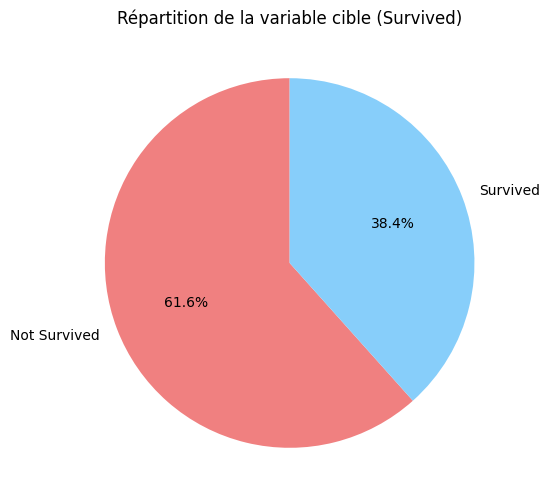

In [107]:
import matplotlib.pyplot as plt

counts = train_data['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Répartition de la variable cible (Survived)')

plt.show()


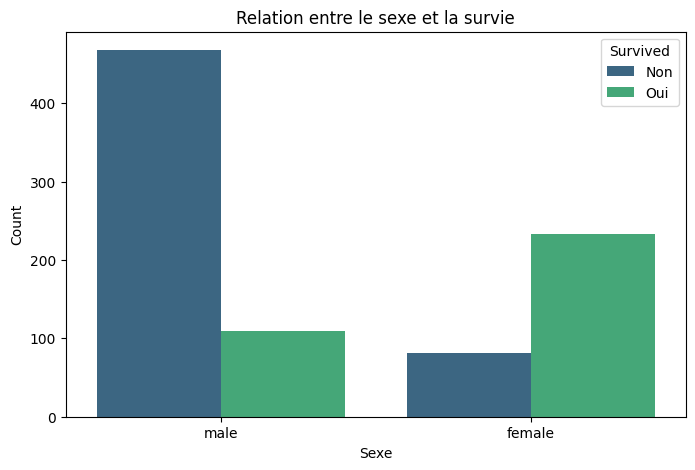

In [108]:
# Relation entre le sexe et la survie
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='viridis')
plt.title('Relation entre le sexe et la survie')
plt.xlabel('Sexe')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Non', 'Oui'])
plt.show()


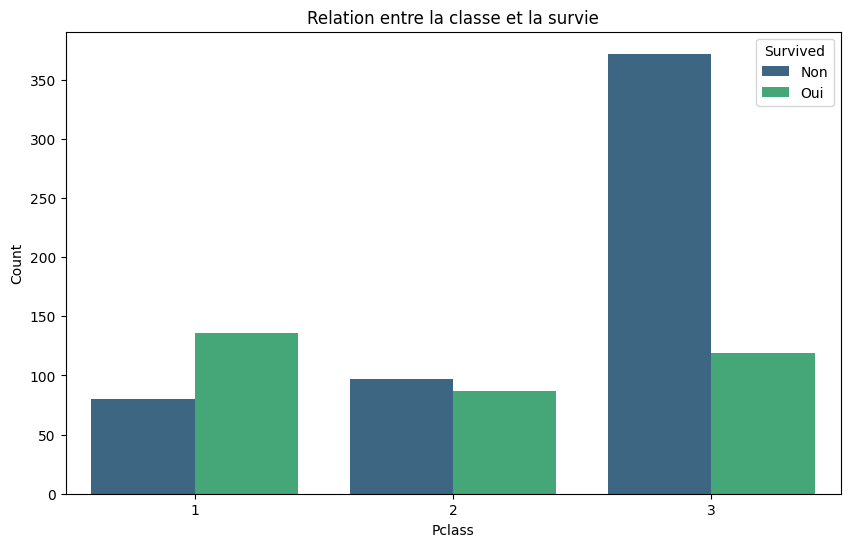

In [109]:
# Relation entre la classe et la survie
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='viridis')
plt.title('Relation entre la classe et la survie')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Non', 'Oui'])
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


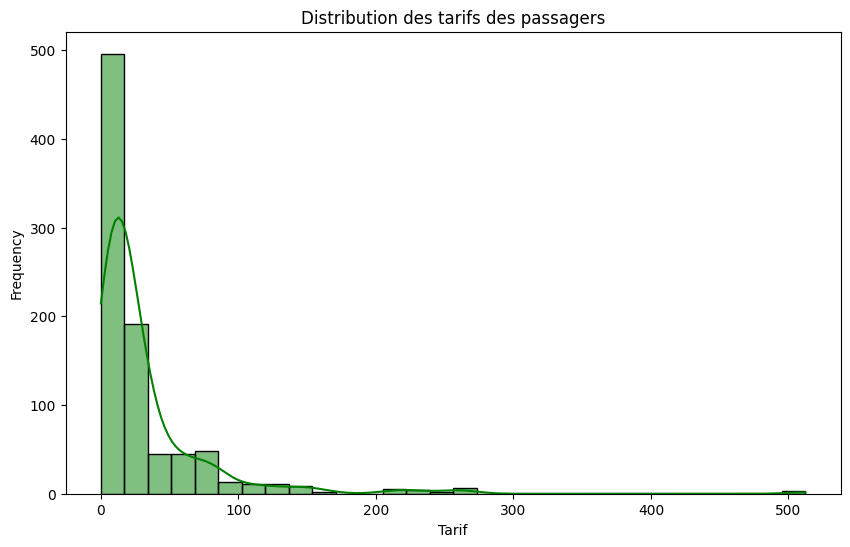

In [110]:
# Distribution des tarifs
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution des tarifs des passagers')
plt.xlabel('Tarif')
plt.ylabel('Frequency')
plt.show()


In [111]:
# Compter les valeurs manquantes dans chaque colonne
missing_values = train_data.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [112]:
# Compter les valeurs manquantes dans chaque colonne
missing_values = test_data.isnull().sum()
print(missing_values)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [113]:
# Remplacer les valeurs manquantes d'Age par la médiane dans train_data
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


/tmp/ipykernel_30/1050465434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [114]:
# Créer une nouvelle colonne indiquant si la cabine est connue
train_data['Cabin_known'] = train_data['Cabin'].notna().astype(int)

# Ensuite, supprimer la colonne Cabin
train_data.drop('Cabin', axis=1, inplace=True)


In [115]:
# Remplacer les valeurs manquantes d'Embarked par la valeur la plus fréquente dans train_data
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_30/1681438990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [116]:
# Vérification des resultats après traitement des valeus manquants
missing_values = train_data.isnull().sum()
print(missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64


In [117]:
#remplacer les valeurs manquant d'Age de test_data par la mediane
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


/tmp/ipykernel_30/31442978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


In [118]:
#Remplacer la valeur manquant de Fare par la mediane dans test_data
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


/tmp/ipykernel_30/166407719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [119]:
#Creation de nouvelle colonne cabin_know binaire (0: si la cabine est connu et 1: si la cabine n'est pas connu) après suppression de la colonne Cabin
test_data['Cabin_known'] = test_data['Cabin'].notna().astype(int)
test_data.drop('Cabin', axis=1, inplace=True)


In [120]:
# Vérification des colonnes après traitement des valeurs manquants 
missing_values = test_data.isnull().sum()
print(missing_values)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64


In [121]:
# Colonnes non pertinentes à supprimer
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [122]:
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [123]:
import pandas as pd

# Appliquer le one-hot encoding sur les colonnes 'Sex' et 'Embarked'
train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Afficher la nouvelle base de données après encodage
print(train_data_encoded.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Cabin_known  Sex_male  \
0         0       3  22.0      1      0   7.2500            0      True   
1         1       1  38.0      1      0  71.2833            1     False   
2         1       3  26.0      0      0   7.9250            0     False   
3         1       1  35.0      1      0  53.1000            1     False   
4         0       3  35.0      0      0   8.0500            0      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [124]:
test_data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,True,True,False
1,3,47.0,1,0,7.0000,0,False,False,True
2,2,62.0,0,0,9.6875,0,True,True,False
3,3,27.0,0,0,8.6625,0,True,False,True
4,3,22.0,1,1,12.2875,0,False,False,True


In [125]:
train_data_encoded['Sex_male'] = train_data_encoded['Sex_male'].astype(int)
train_data_encoded['Embarked_Q'] = train_data_encoded['Embarked_Q'].astype(int)
train_data_encoded['Embarked_S'] = train_data_encoded['Embarked_S'].astype(int)

train_data_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [126]:
test_data_encoded['Sex_male'] = test_data_encoded['Sex_male'].astype(int)
test_data_encoded['Embarked_Q'] = test_data_encoded['Embarked_Q'].astype(int)
test_data_encoded['Embarked_S'] = test_data_encoded['Embarked_S'].astype(int)

test_data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [127]:

from imblearn.over_sampling import SMOTE

# Créer un objet SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE pour équilibrer les classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Vérifier la répartition après suréchantillonnage
print(pd.Series(y_resampled).value_counts())


Survived
0    549
1    549
Name: count, dtype: int64


Text(0, 0.5, 'Count')

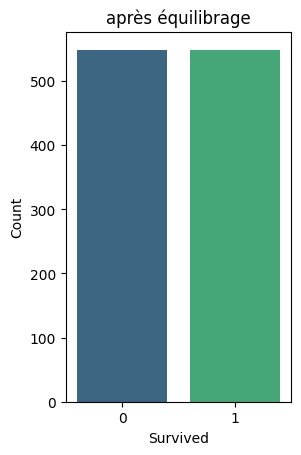

In [128]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='viridis')
plt.title('après équilibrage')
plt.xlabel('Survived')
plt.ylabel('Count')

In [129]:
#séparation des données de caractéristique et la cible 
X = train_data_encoded.drop('Survived', axis=1)  
y = train_data_encoded['Survived']  


In [130]:
X

,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [132]:
from sklearn.linear_model import LogisticRegression

# Créer une instance de votre modèle
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
# Évaluer le modèle sur l'ensemble de validation
val_accuracy = model.score(X_val, y_val)
print(f'Accuracy sur l\'ensemble de validation : {val_accuracy:.2f}')

Accuracy sur l'ensemble de validation : 0.84


In [134]:
# Faire des prédictions sur l'ensemble de test
test_predictions = model.predict(test_data_encoded)  # X_test_data est votre ensemble de test initial


In [135]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Faire des prédictions sur l'ensemble de validation
y_val_predictions = model.predict(X_val)

# Afficher le rapport de classification
print(classification_report(y_val, y_val_predictions))

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_val_predictions)



              precision    recall  f1-score   support

           0       0.86      0.79      0.82       103
           1       0.83      0.89      0.86       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



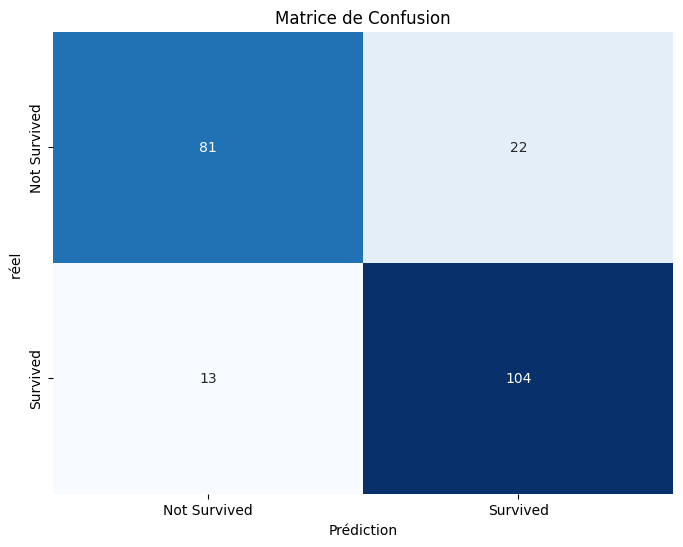

In [136]:

# Créer un DataFrame pour la matrice de confusion
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])

# Afficher la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.ylabel('réel ')
plt.xlabel('Prédiction')
plt.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Créer une instance du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de validation
rf_val_accuracy = rf_model.score(X_val, y_val)
print(f'Accuracy Random Forest sur l\'ensemble de validation : {rf_val_accuracy:.2f}')


Accuracy Random Forest sur l'ensemble de validation : 0.87


In [138]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Faire des prédictions sur l'ensemble de validation
rf_predictions = rf_model.predict(X_val)

# Calculer les métriques
f1 = f1_score(y_val, rf_predictions)
classification_rep = classification_report(y_val, rf_predictions)

# Afficher le F1 score et le rapport de classification

print(classification_rep)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.88      0.88      0.88       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



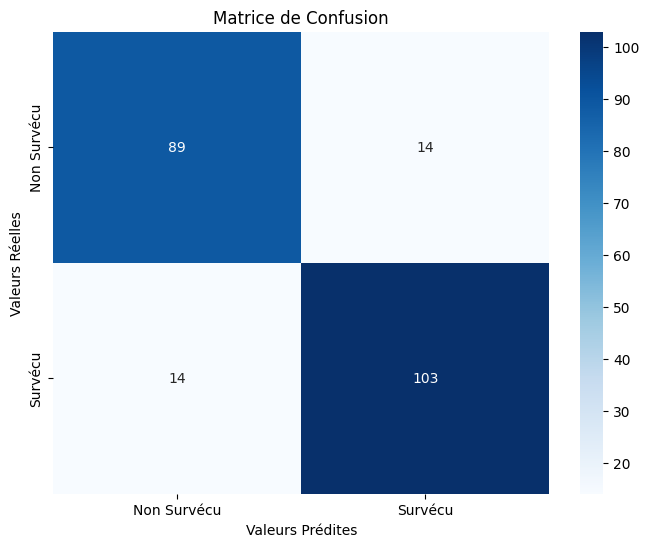

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de validation
rf_predictions = rf_model.predict(X_val)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_val, rf_predictions)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Survécu', 'Survécu'], yticklabels=['Non Survécu', 'Survécu'])
plt.ylabel('Valeurs Réelles')
plt.xlabel('Valeurs Prédites')
plt.title('Matrice de Confusion')
plt.show()


In [140]:
feature_columns = X.columns 

In [141]:
import joblib

# Sauvegardez ces colonnes avec votre modèle
joblib.dump((rf_model), 'rf_model.pkl')

['rf_model.pkl']

In [142]:
# Charger le modèle et les colonnes 
rf_model = joblib.load('rf_model.pkl')

In [143]:
# Obtenir les noms des colonnes utilisées lors de l'entraînement
print(rf_model.feature_names_in_)


['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Cabin_known' 'Sex_male'
 'Embarked_Q' 'Embarked_S']


In [144]:
new_data = pd.DataFrame({
    'Pclass': [3],            
    'Sex': ['male'],         
    'Age': [45],             
    'SibSp': [1],             
    'Parch': [0],             
    'Fare': [8.05],           
    'Embarked': ['S'],        
    'Cabin': [None]           
})

In [145]:


# Remplacer les valeurs manquantes par les moyennes (comme pendant l'entraînement)
new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)
new_data['Fare'].fillna(new_data['Fare'].mean(), inplace=True)

# Encodage binaire de la colonne 'Sex'
new_data['Sex_male'] = new_data['Sex'].map({'male': 1, 'female': 0})

# Encodage one-hot de la colonne 'Embarked'
new_data['Embarked_Q'] = new_data['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
new_data['Embarked_S'] = new_data['Embarked'].apply(lambda x: 1 if x == 'S' else 0)

# Vérification si la cabine est connue ou non
new_data['Cabin_known'] = new_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Sélectionner uniquement les colonnes utilisées lors de l'entraînement
new_data_preprocessed = new_data[feature_columns]

# Affichage des données prétraitées
print(new_data_preprocessed)


   Pclass  Age  SibSp  Parch  Fare  Cabin_known  Sex_male  Embarked_Q  \
0       3   45      1      0  8.05            0         1           0   

   Embarked_S  
0           1  


/tmp/ipykernel_30/1804839200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)
/tmp/ipykernel_30/1804839200.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [146]:
# Réorganiser les nouvelles données pour qu'elles correspondent à l'ordre attendu par le modèle
new_data_preprocessed = new_data_preprocessed[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_known', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# Faire la prédiction sur la nouvelle donnée prétraitée
new_prediction = rf_model.predict(new_data_preprocessed)

# Mapper les prédictions à des catégories
categories = {0: "La personne n'a pas survécu", 1: "La personne a survécu"}

# Afficher la prédiction sous forme de catégorie
resultat = categories[new_prediction[0]]  # Comme c'est une seule prédiction, on prend le premier élément
print("Prédiction :", resultat)


Prédiction : La personne n'a pas survécu
